In [65]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

ImportError: Numba needs NumPy 1.25 or less

In [1]:
df = pd.read_pickle('data/merged_recipies_and_weekly_menus.pkl')
df.head()

,ID,Title,Description,Ingredients,year,week,week_day,recipe_id,description,title,url,text,n_tokens,vector
0,7d9a6e4e-9d34-4715-bf08-5b65f709d664,Klassisk minestronesuppe,"Oppskrift på italiensk minestronesuppe, med go...","rødløk, hvitløk, stangselleri, gulrøtter, chil...",2021,35,Onsdag,7d9a6e4e-9d34-4715-bf08-5b65f709d664,"Oppskrift på italiensk minestronesuppe, med go...",Klassisk minestronesuppe,/oppskrifter/Suppe/klassisk-minestronesuppe/,Tittel: Klassisk minestronesuppe. Beskrivelse:...,155,"[0.01983242854475975, -0.02484963834285736, 0...."
1,d1ba9cfb-d048-9475-ddb9-1f1aa3cf33f1,Kremet pasta med laks,"Pasta med kremet saus, stekt laks og erter er ...","pasta, frosne grønne erter, smør, creme fraiche",-1,-1,NaN,NaN,NaN,NaN,NaN,Tittel: Kremet pasta med laks. Beskrivelse: Pa...,98,"[0.02298697829246521, 0.006297714542597532, 0...."
2,9f4eac12-2edf-ad9c-14d9-90bb92bcc3d8,Kyllingfilet med soppsaus,Oppskrift på god og enkel hverdagsmiddag med k...,"løk, sjampinjong, crême fraiche, soyasaus, kyl...",-1,-1,NaN,NaN,NaN,NaN,NaN,Tittel: Kyllingfilet med soppsaus. Beskrivelse...,132,"[0.00546360295265913, -0.002787069184705615, -..."
3,8bec3976-7837-420d-b94f-d078b2ac6ae3,Klassisk risotto,"Slik lager du klassisk italiensk risotto, med ...","risottoris, olivenolje, gul løk, hvitvin, kyll...",2021,43,Mandag,8bec3976-7837-420d-b94f-d078b2ac6ae3,"Slik lager du klassisk italiensk risotto, med ...",Klassisk risotto,/oppskrifter/ris/klassisk-risotto/,Tittel: Klassisk risotto. Beskrivelse: Slik la...,112,"[0.01895941235125065, -0.04094412550330162, -0..."
4,328e4786-f496-4dde-a5f5-8675668a1c89,Lammeburger med kantareller og tyttebærkrem,Oppskrift på en saftig høstburger med sesongen...,"MENY lammeburgere, smør, burgerbrød, ferske ka...",-1,-1,NaN,NaN,NaN,NaN,NaN,Tittel: Lammeburger med kantareller og tyttebæ...,170,"[-0.011739281006157398, -0.018055418506264687,..."


In [34]:
embeddings = df["vector"].apply(pd.Series)
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,0.019832,-0.024850,0.000624,-0.042528,0.017087,-0.000036,-0.010625,-0.004669,-0.025244,-0.041399,...,0.008340,-0.020003,0.006035,-0.028107,-0.007644,-0.003016,-0.022499,-0.001460,0.000690,-0.009772
1,0.022987,0.006298,0.009629,-0.026113,0.017798,0.004590,0.002354,-0.021091,-0.019515,-0.020245,...,0.000007,0.001181,0.004033,-0.032238,-0.006480,0.016990,0.004805,0.010577,0.006048,-0.019796
2,0.005464,-0.002787,-0.002699,-0.024924,0.020932,-0.004289,0.003024,-0.029687,-0.023926,-0.020326,...,0.010378,-0.000764,-0.001819,-0.041713,0.008388,-0.011818,0.019214,-0.003859,0.000892,0.001990
3,0.018959,-0.040944,-0.010864,-0.036355,0.031279,-0.008320,-0.010864,-0.008108,-0.021062,-0.021139,...,0.002798,-0.004951,-0.005227,-0.033740,-0.028535,-0.027510,0.004865,-0.009480,-0.006698,0.004102
4,-0.011739,-0.018055,0.011837,-0.036189,0.016282,0.013871,-0.008356,-0.000754,-0.036841,-0.031600,...,0.025838,-0.005492,0.006798,-0.038145,0.001783,0.013558,-0.005462,-0.007379,0.014757,0.014105


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(embeddings)

In [67]:
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
reduced_embeddings = tsne.fit_transform(pca_result)

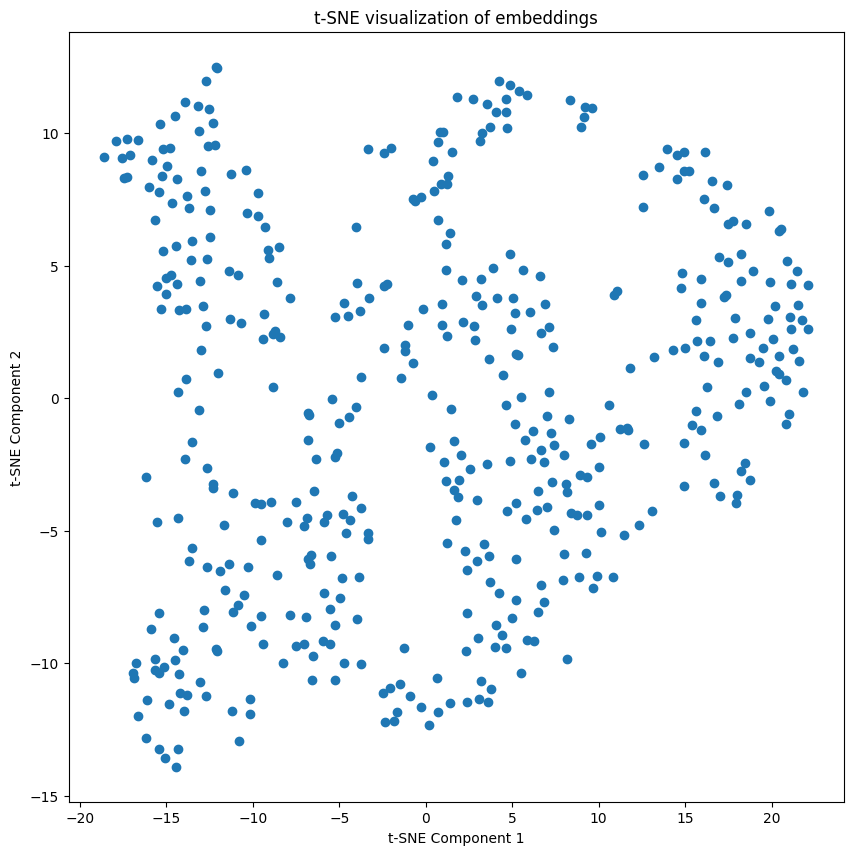

In [68]:
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE visualization of embeddings')
plt.show()